In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [49]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 3. Suskirstykite šalis į 5 klasterius naudodamiesi GDP ir "Volume of exports of goods"

In [57]:
# isikeliame duomenu lentele .csv formatu
duomenys = "C:\\Users\\inves\\OneDrive\\Dokumentai\\DATA learning\\PROJEKTAS\\WEOOct2022.csv"

df = pd.read_csv(duomenys)
df

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2019,2020,2021,2022,2023,2024,2025,2026,2027,Estimates Start After
0,512,AFG,NGDP_R,Afghanistan,"Gross domestic product, constant prices",Expressed in billions of national currency uni...,National currency,Billions,Source: National Statistics Office Latest actu...,NaN,...,"1,319.90","1,288.87",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
1,512,AFG,NGDP_RPCH,Afghanistan,"Gross domestic product, constant prices",Annual percentages of constant price GDP are y...,Percent change,NaN,"See notes for: Gross domestic product, consta...",NaN,...,3.912,-2.351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
2,512,AFG,NGDP,Afghanistan,"Gross domestic product, current prices",Expressed in billions of national currency uni...,National currency,Billions,Source: National Statistics Office Latest actu...,NaN,...,"1,469.60","1,547.29",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
3,512,AFG,NGDPD,Afghanistan,"Gross domestic product, current prices",Values are based upon GDP in national currency...,U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",NaN,...,18.876,20.136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
4,512,AFG,PPPGDP,Afghanistan,"Gross domestic product, current prices",These data form the basis for the country weig...,Purchasing power parity; international dollars,Billions,"See notes for: Gross domestic product, curren...",NaN,...,81.873,80.912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8621,698,ZWE,NGDP_FY,Zimbabwe,Gross domestic product corresponding to fiscal...,Gross domestic product corresponding to fiscal...,National currency,Billions,Source: Ministry of Finance or Treasury Latest...,NaN,...,187.419,"1,189.14","2,911.11","14,408.63","41,965.70","72,190.13","97,188.08","113,996.38","131,931.52",2019.0
8622,698,ZWE,BCA,Zimbabwe,Current account balance,Current account is all transactions other than...,U.S. dollars,Billions,Source: Reserve Bank of Zimbabwe and Ministry ...,-0.301,...,0.92,0.678,0.348,0.215,0.096,0.149,0.206,0.237,0.201,2020.0
8623,698,ZWE,BCA_NGDPD,Zimbabwe,Current account balance,Current account is all transactions other than...,Percent of GDP,NaN,"See notes for: Gross domestic product, curren...",NaN,...,4.003,2.926,1.059,0.561,0.257,0.384,0.531,0.612,0.498,2019.0
8624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
# pasitikriname esanciu NaN reiksmiu kieki, duomenu tipa, stulpeliu pavadinimus ir kiekius
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8626 entries, 0 to 8625
Data columns (total 58 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   WEO Country Code               8625 non-null   object 
 1   ISO                            8624 non-null   object 
 2   WEO Subject Code               8624 non-null   object 
 3   Country                        8624 non-null   object 
 4   Subject Descriptor             8624 non-null   object 
 5   Subject Notes                  8624 non-null   object 
 6   Units                          8624 non-null   object 
 7   Scale                          3920 non-null   object 
 8   Country/Series-specific Notes  7641 non-null   object 
 9   1980                           3886 non-null   object 
 10  1981                           4007 non-null   object 
 11  1982                           4050 non-null   object 
 12  1983                           4091 non-null   o

In [26]:
#  pasiliekma tik stulpelius su 1980-2021 duomenimis
df = df.drop(['2022', '2023', '2024', '2025', '2026', '2027', 'Estimates Start After'], axis=1)
df

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,512,AFG,NGDP_R,Afghanistan,"Gross domestic product, constant prices",Expressed in billions of national currency uni...,National currency,Billions,Source: National Statistics Office Latest actu...,NaN,...,"1,092.12","1,154.18","1,185.31","1,197.01","1,222.92","1,255.29","1,270.22","1,319.90","1,288.87",NaN
1,512,AFG,NGDP_RPCH,Afghanistan,"Gross domestic product, constant prices",Annual percentages of constant price GDP are y...,Percent change,NaN,"See notes for: Gross domestic product, consta...",NaN,...,13.968,5.683,2.697,0.988,2.164,2.647,1.189,3.912,-2.351,NaN
2,512,AFG,NGDP,Afghanistan,"Gross domestic product, current prices",Expressed in billions of national currency uni...,National currency,Billions,Source: National Statistics Office Latest actu...,NaN,...,"1,033.59","1,116.83","1,183.04","1,226.57","1,222.92","1,285.46","1,327.69","1,469.60","1,547.29",NaN
3,512,AFG,NGDPD,Afghanistan,"Gross domestic product, current prices",Values are based upon GDP in national currency...,U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",NaN,...,20.293,20.17,20.616,20.057,18.02,18.883,18.401,18.876,20.136,NaN
4,512,AFG,PPPGDP,Afghanistan,"Gross domestic product, current prices",These data form the basis for the country weig...,Purchasing power parity; international dollars,Billions,"See notes for: Gross domestic product, curren...",NaN,...,59.945,63.784,69.444,72.056,70.098,74.712,77.406,81.873,80.912,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8621,698,ZWE,NGDP_FY,Zimbabwe,Gross domestic product corresponding to fiscal...,Gross domestic product corresponding to fiscal...,National currency,Billions,Source: Ministry of Finance or Treasury Latest...,NaN,...,17.116,19.093,19.499,19.969,20.555,21.385,36.945,187.419,"1,189.14","2,911.11"
8622,698,ZWE,BCA,Zimbabwe,Current account balance,Current account is all transactions other than...,U.S. dollars,Billions,Source: Reserve Bank of Zimbabwe and Ministry ...,-0.301,...,-2.278,-2.649,-2.334,-1.597,-0.697,-0.271,-1.38,0.92,0.678,0.348
8623,698,ZWE,BCA_NGDPD,Zimbabwe,Current account balance,Current account is all transactions other than...,Percent of GDP,NaN,"See notes for: Gross domestic product, curren...",NaN,...,-13.307,-13.873,-11.969,-7.996,-3.393,-1.268,-3.734,4.003,2.926,1.059
8624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# pasiziurim turimus duomenis Subject Descriptor stulpelyje
reiksmes = df['Subject Descriptor'].tolist()
reiksmes

['Gross domestic product, constant prices',
 'Gross domestic product, constant prices',
 'Gross domestic product, current prices',
 'Gross domestic product, current prices',
 'Gross domestic product, current prices',
 'Gross domestic product, deflator',
 'Gross domestic product per capita, constant prices',
 'Gross domestic product per capita, constant prices',
 'Gross domestic product per capita, current prices',
 'Gross domestic product per capita, current prices',
 'Gross domestic product per capita, current prices',
 'Output gap in percent of potential GDP',
 'Gross domestic product based on purchasing-power-parity (PPP) share of world total',
 'Implied PPP conversion rate',
 'Total investment',
 'Gross national savings',
 'Inflation, average consumer prices',
 'Inflation, average consumer prices',
 'Inflation, end of period consumer prices',
 'Inflation, end of period consumer prices',
 'Volume of imports of goods and services',
 'Volume of Imports of goods',
 'Volume of exports o

In [61]:
# issirenkam eilutes su GDP u.s.dollars valiuta ir su volume of exports goods
ieskomos_reiksmes = ['Gross domestic product, current prices', 'Volume of exports of goods', 'U.S. dollars', 'Percent change' ]

df = df[df['Subject Descriptor'].isin(ieskomos_reiksmes)]
df

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2019,2020,2021,2022,2023,2024,2025,2026,2027,Estimates Start After
2,512,AFG,NGDP,Afghanistan,"Gross domestic product, current prices",Expressed in billions of national currency uni...,National currency,Billions,Source: National Statistics Office Latest actu...,NaN,...,"1,469.60","1,547.29",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
3,512,AFG,NGDPD,Afghanistan,"Gross domestic product, current prices",Values are based upon GDP in national currency...,U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",NaN,...,18.876,20.136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
4,512,AFG,PPPGDP,Afghanistan,"Gross domestic product, current prices",These data form the basis for the country weig...,Purchasing power parity; international dollars,Billions,"See notes for: Gross domestic product, curren...",NaN,...,81.873,80.912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
23,512,AFG,TXG_RPCH,Afghanistan,Volume of exports of goods,Percent change of volume of exports of goods r...,Percent change,NaN,Source: Various sources: Central Statistical O...,NaN,...,1.531,-16.606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.0
46,914,ALB,NGDP,Albania,"Gross domestic product, current prices",Expressed in billions of national currency uni...,National currency,Billions,Source: IMF Staff Estimates. Official national...,18.489,...,"1,691.90","1,644.08","1,889.84","2,059.02","2,176.66","2,287.47","2,403.26","2,530.79","2,664.39",2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,754,ZMB,TXG_RPCH,Zambia,Volume of exports of goods,Percent change of volume of exports of goods r...,Percent change,NaN,"Source: Central Bank. Values from BOP, volumes...",NaN,...,-11.722,9.23,-2.79,-4.549,8.439,9.68,7.561,10.539,13.74,2021.0
8582,698,ZWE,NGDP,Zimbabwe,"Gross domestic product, current prices",Expressed in billions of national currency uni...,National currency,Billions,Source: National Statistics Office Latest actu...,NaN,...,187.419,"1,189.14","2,911.11","14,408.63","41,965.70","72,190.13","97,188.08","113,996.38","131,931.52",2019.0
8583,698,ZWE,NGDPD,Zimbabwe,"Gross domestic product, current prices",Values are based upon GDP in national currency...,U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",NaN,...,22.995,23.181,32.868,38.28,37.303,38.708,38.794,38.678,40.397,2019.0
8584,698,ZWE,PPPGDP,Zimbabwe,"Gross domestic product, current prices",These data form the basis for the country weig...,Purchasing power parity; international dollars,Billions,"See notes for: Gross domestic product, curren...",NaN,...,34.187,32.816,36.626,40.408,43.037,45.211,47.409,49.74,52.203,2019.0


In [62]:
df = df[df['Units'].isin(ieskomos_reiksmes)]
df

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2019,2020,2021,2022,2023,2024,2025,2026,2027,Estimates Start After
3,512,AFG,NGDPD,Afghanistan,"Gross domestic product, current prices",Values are based upon GDP in national currency...,U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",NaN,...,18.876,20.136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
23,512,AFG,TXG_RPCH,Afghanistan,Volume of exports of goods,Percent change of volume of exports of goods r...,Percent change,NaN,Source: Various sources: Central Statistical O...,NaN,...,1.531,-16.606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.0
47,914,ALB,NGDPD,Albania,"Gross domestic product, current prices",Values are based upon GDP in national currency...,U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",1.946,...,15.399,15.161,18.31,18.256,18.842,19.858,21.219,22.528,23.889,2020.0
67,914,ALB,TXG_RPCH,Albania,Volume of exports of goods,Percent change of volume of exports of goods r...,Percent change,NaN,Source: Central Bank Latest actual data: 2020 ...,0,...,-9.394,-2.056,30.121,5.31,-7.419,-0.7,5.969,3.871,3.776,2020.0
91,612,DZA,NGDPD,Algeria,"Gross domestic product, current prices",Values are based upon GDP in national currency...,U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",42.346,...,171.68,144.922,162.711,187.155,190.254,196.624,205.435,215.544,224.042,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8515,474,YEM,TXG_RPCH,Yemen,Volume of exports of goods,Percent change of volume of exports of goods r...,Percent change,NaN,Source: IMF Staff Estimates. We complement the...,NaN,...,30.832,0.067,34.566,54.452,-0.098,46.399,23.687,24.629,17.61,2020.0
8539,754,ZMB,NGDPD,Zambia,"Gross domestic product, current prices",Values are based upon GDP in national currency...,U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",4.246,...,23.309,18.111,21.313,27.025,28.798,30.966,33.313,35.945,38.801,2021.0
8559,754,ZMB,TXG_RPCH,Zambia,Volume of exports of goods,Percent change of volume of exports of goods r...,Percent change,NaN,"Source: Central Bank. Values from BOP, volumes...",NaN,...,-11.722,9.23,-2.79,-4.549,8.439,9.68,7.561,10.539,13.74,2021.0
8583,698,ZWE,NGDPD,Zimbabwe,"Gross domestic product, current prices",Values are based upon GDP in national currency...,U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",NaN,...,22.995,23.181,32.868,38.28,37.303,38.708,38.794,38.678,40.397,2019.0


In [65]:
#  1980 stulpelyj eyra '--' reiksme ja pakeiciam 0, kitas eilutes su NaN reiksmem istrinam
df = df.replace('--', 0)
df = df.dropna()

In [66]:
# kmeans clusterizavimas

metai = ['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
# tukstantines reiksmes yra atskirtos kableliu, keiciam ir nepaliekma tarpo
df[metai] = df[metai].replace(',', '', regex=True)
# metu duomenis verciam i float duomenu tipa
df[metai] = df[metai].astype(float)
data = df[metai].values
#  atliekam clusterizavima
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(data)
# sukuriam stulpeli
df['Clusters'] = clusters
# atsivaizduojam kuri salis i koki clusteri patenka
df[['Country', 'Clusters']]

C:\Users\inves\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Country,Clusters
47,Albania,2
91,Algeria,2
179,Angola,2
223,Antigua and Barbuda,2
267,Argentina,2
...,...,...
8187,United States,4
8231,Uruguay,2
8319,Vanuatu,2
8407,Vietnam,2


KeyError: 0

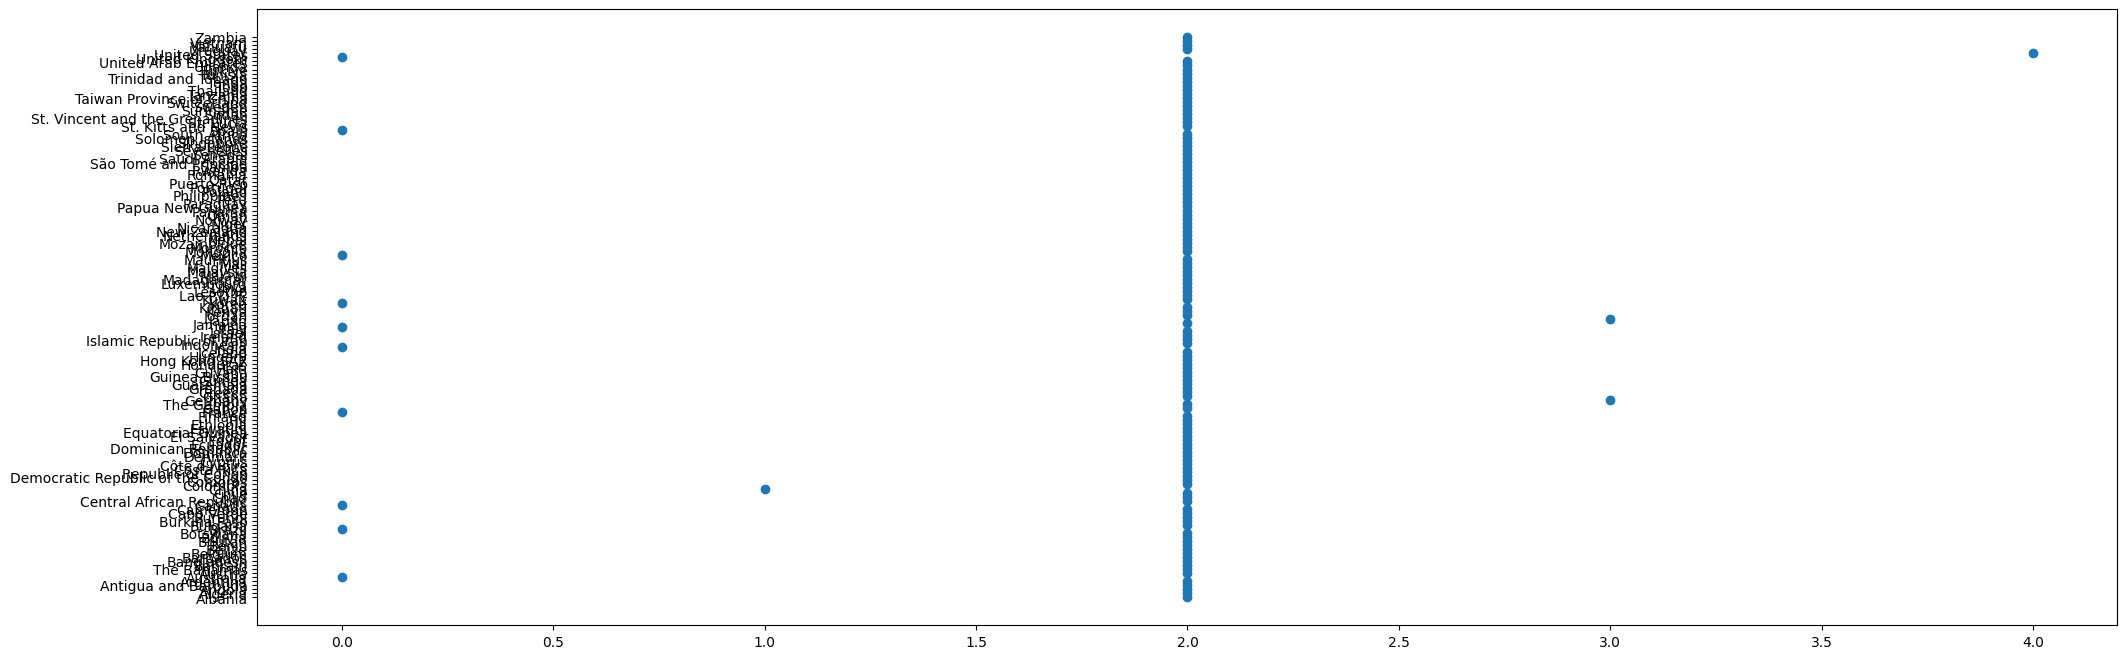

In [75]:
#  atsivaziduojam grafiskai kaip issidesto clusteriai pagal salis
x = df['Clusters']
y = df['Country']
plt.figure(figsize=(24, 8))

plt.scatter(x,y)
for i, country in enumerate(df['Country']):
#     plt.annotate(country, (x[i], y[i]))
    plt.text(x[i] + 0.1, y[i], country)
    
plt.title('Cluster atvaizdavimas')
plt.xlabel('Clusteris')
plt.ylabel('Šalis')

plt.show

In [76]:
# kiek saliu pateko i tam tikra clusteri
df['Clusters'].value_counts()

2    126
0     10
3      2
1      1
4      1
Name: Clusters, dtype: int64